# Dec add for supplemental plots

Directory already exists: /Volumes/ESD-USB/DATA_sns_junction_project_from_service/codes_data_list_via_plot/Mac_folder_plot/Plots_collection


/var/folders/sx/8zcff90529g69ly3gjnfhzgr0000gn/T/ipykernel_7707/2844332154.py:178: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_xticklabels([r"\bf{0.5}",  r"\bf{1}"])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Plot saved to: /Volumes/ESD-USB/DATA_sns_junction_project_from_service/codes_data_list_via_plot/Mac_folder_plot/Plots_collection/FigS1.png


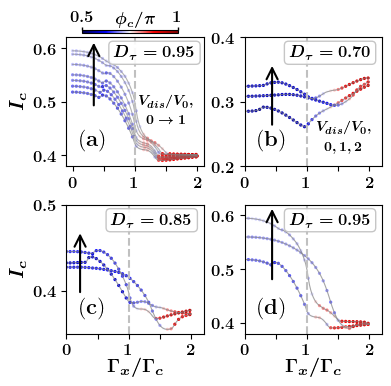

In [12]:
# Use scatter plot to indicate the skewness of the CPR.

import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from read_plot_assist import *


reduced_factor = (2 * 1.6e-19 * 1e-3 / (4.13e-15) * 1e9)*0.3*2 

               # such that the unit is e \Delta /hbar, factor 2 is coming from the half 1 of the electron operator 

import pandas as pd
import csv

# ======================
# 主程序
# ======================
def main():
    # 获取绘图参数
    plot_config = set_plotting_style()
    
    # 设置工作目录
    dir = os.getcwd() 
    dirF = os.path.join(dir, "Plots_collection")
    
    # 确保Plots_collection目录存在
    if not os.path.exists(dirF):
        os.makedirs(dirF)
        print(f"Created directory: {dirF}")
    else:
        print(f"Directory already exists: {dirF}")
    
    # 创建图形和布局
    ################  previous figure set   
    # width = 3.847 * 1.3
    # height = 0.64 * width*2
    # fig = plt.figure(figsize=(width, height))
    
    ############### updated figure set   
    # width = 3.847 * 2.1
    # height = 0.64 * width * 1.8

    # width = 3.847*1.6  # * 1.35
    # height = 1.4 * width #1.2 * width
    
    width = 3.847*1.0  # * 1.35
    height = 1.0 * width  #1.2 * width
    
    fig = plt.figure(figsize=(width, height))
    

    # 创建主GridSpec：2行1列
    main_gs = GridSpec(2, 1, figure=fig, height_ratios=[1., 1.0],hspace=0.3)
    
    # 顶部区域：创建2个面板的GridSpec
    top_gs = GridSpecFromSubplotSpec(1, 2, subplot_spec=main_gs[0], width_ratios=[1, 1.0],wspace=0.3)
    
    
    ax2 = fig.add_subplot(top_gs[0, 0])
    ax1 = fig.add_subplot(top_gs[0, 1])
    
    # 底部区域：创建3个面板的GridSpec
    bottom_gs = GridSpecFromSubplotSpec(1, 2, subplot_spec=main_gs[1], width_ratios=[1, 1],wspace=0.3)
        
    ax3 = fig.add_subplot(bottom_gs[0, 0])
    ax4 = fig.add_subplot(bottom_gs[0, 1])

    # 获取配置参数
    colors = plot_config['colors']
    line_styles = plot_config['line_styles']
    legend_settings = plot_config['legend_settings']
    tick_settings = plot_config['tick_settings']
    grid_settings = plot_config['grid_settings']
    sizes = plot_config['sizes']
    labelpad_distance = -1
    
    # ======================
    # Panel 1: CPR curves
    # ======================
    # # ax0 = fig.add_subplot(gs[1, 0])
    # vtaus0 = [0.842, 1.000]
    # selected_bs = [0.5, 2.0]
    
    # # 自定义离散颜色方案
    
    # # 绘制数据



    # ====================== ====================== ====================== ======================
    # Panel 1: Critical current vs B for several Dtaus
    # ====================== ====================== ====================== ======================
    
    vtaus = [0.842, 0.882, 0.904, 0.934, 1.000]
    Dtaus = [0.75, 0.85, 0.90, 0.95, 1.00]
    # 为不同 vtau 创建颜色映射
    
    line_cmap = plt.cm.seismic
    vtau_colors_cmap = line_cmap(np.linspace(0,1, len(vtaus))) # 
    
    vtau_color_dict = dict(zip(vtaus, vtau_colors_cmap))
    scatter_cmap = plt.cm.seismic
    
    # ax1_right = ax1.twinx()

    markers = ['^','.','d','o','s']
    marker_sizes = [4,6,4,3,3]
    # ax1 = fig.add_subplot(gs[0, 0])
    # handle_list = []
    # # 使用离散颜色方案绘制数据
    # for i0, vtau in enumerate(vtaus):
    #     # color = vtau_colors_cmap[i0]
    #     file_path = f"CPR_data_sweep_B_vtau_{vtau:.3f}_separate_summary_Vdis=0.0_disorder1_cp19th2.csv"
    #     # file_path = f"CPR_data_sweep_B_vtau_{vtau:.3f}_separate_summary_v0.csv"
    #     columns_to_read = ['B', 'Ic_max', 'Ic_min','phi0_max','phi0_min']
        
    #     metadata, df = read_select_data(file_path, columns_to_read=columns_to_read)

    #     xs = df['B'].values
    #     ys = (df['Ic_max'].values - df['Ic_min'].values)/2/reduced_factor
    #     cs = df['phi0_max'].values/np.pi
    #     line1, = ax1.plot(-xs-0.5, ys, color='grey', linestyle ='-', marker =markers[i0],markersize =5, 
    #              linewidth =0.8, alpha=0.7, label = r"%.2f"%Dtaus[i0]) #Dtaus, fontsize= sizes['legend']
        
    #     ax1.plot(xs, ys, color='grey', linestyle ='-', marker =markers[i0],markersize =0, 
    #              linewidth =0.8, alpha=0.7, label = r"%.2f"%Dtaus[i0]) #Dtaus, fontsize= sizes['legend']
    #     # print(len(xs))
    #     # masks = ::5
    #     ax1.scatter(xs[::3], ys[::3], s=marker_sizes[i0], marker= markers[i0], linestyle ='-', 
    #                 c=cs[::3], cmap = scatter_cmap, vmin=0.5, vmax=1, linewidth =1.5)
    #     handle_list.append(line1)
        
    # # 设置轴标签
    # ax1.set_xlabel(r'$\boldsymbol{\Gamma_{x}/\Gamma_c}$', fontsize=sizes['label'], labelpad=labelpad_distance )
    # # ax1.xaxis.label.set_position((0.2, 0.05))
    
    # ax1.set_ylabel(r'$\boldsymbol{I_{c}~(e\Delta/\hbar)}$', fontsize=sizes['label'],labelpad=labelpad_distance +3)
    # # ax1.set_ylabel(r'', fontsize=sizes['label'])
    # labels_list = [r'\bf{0.75}',r'\bf{0.85}',r'\bf{0.9}',r'\bf{0.95}',r'\bf{1.0}'] 
    
    # ax1.legend(handle_list[::-1], labels_list[::-1], 
    #             ncols = 1,  # 总列数等于句柄数量
    #            handlelength = 0.8, 
    #            handletextpad = 0.3, 
    #            columnspacing = 0.08,  # 增加列间距
    #            fontsize = sizes['legend']-2,
    #            facecolor = 'none',
    #            edgecolor ='none',
    #            loc = 'upper center',
    #            bbox_to_anchor = (0.78, 1.05),
    #            frameon = False)
    
    
                        
    # 设置网格
    # ax1.grid(**grid_settings)
    
    # 设置刻度方向
    # ax1.tick_params(direction=tick_settings['direction'], length=tick_settings['length'], width=tick_settings['width'])

    
    cbar_ax = fig.add_axes([0.1, 0.98, 0.02, 0.35])
    
    # 创建垂直颜色条（在已有的 cbar_ax 上）
    cbar = mpl.colorbar.ColorbarBase(cbar_ax, 
                                           cmap= scatter_cmap,  # 使用其中一个colormap
                                           norm=mpl.colors.Normalize(vmin=0.5, vmax=1),
                                           orientation='horizontal')
    # cbar.ax.tick_params(labelsize=12) # ,direction ='in' # sizes['cbar_tick']
    
    cbar.ax.set_xticklabels([r"\bf{0.5}",  r"\bf{1}"])
    cbar.ax.tick_params(labelsize =  sizes['cbar_tick'],
                            length = 2.0 ,#tick_settings['length'],
                            width= 1,
                            pad= 2)
    cbar_ax.text(0.55, 1.65, r'$\boldsymbol{\phi_{c}/\pi}$',
                 transform=cbar_ax.transAxes,
                 fontsize = sizes['cbar_label'],ha='center', va='bottom')  # sizes['cbar_label']
    cbar.ax.xaxis.set_ticks_position('top')
    cbar.ax.xaxis.set_label_position('top')
    
    cbar_ax.set_position([0.12, 0.93,  0.25, 0.01])  # [左, 下, 宽, 高]    

    
    # ax1_right.set_ylim(ax3.get_ylim())
    # ax1_right.set_yticks(ax3.get_yticks())

    # ====================== ====================== ====================== ======================
    # Panel 2: CPR curves B, for single Dtau, various Vdis 
    # ====================== ====================== ====================== ======================

    # vtaus = [0.842, 0.882, 0.904, 0.934, 1.000]  [0.338] -> [0.05]
    vtau = 0.934
    
    # 1. 使用指定的透明度值
    alpha_max = 1.0
    alpha_min = 0.2
    alpha_values = [alpha_max,
                    alpha_max*0.75, 
                    alpha_max*0.5,
                    alpha_min*1.45,
                    alpha_min*1.25,
                    alpha_min*1.1,
                    alpha_min]
    
    Vdis_list = [0.0,0.1,0.2,0.3,0.5,0.8,1.0] # ,1.2,1.5,1.8
    Dtaus = [0.75, 0.85, 0.90, 0.95, 1.00]
    
    # 使用离散颜色方案绘制数据
    for i in range(len(Vdis_list)):
        # print(i)
        # color =  vtau_colors[vtau]
        
        color = vtau_color_dict[vtau]
        file_path = f"CPR_data_sweep_B_vtau_{vtau:.3f}_separate_summary_Vdis={Vdis_list[i]:.1f}_disorder1_addDec.csv"
        # columns_to_read = ['B', 'Ic_max', 'Ic_min']
        # metadata, df = read_select_data(file_path, columns_to_read=columns_to_read)

        columns_to_read = ['B', 'Ic_max', 'Ic_min','phi0_max','phi0_min']
        
        metadata, df = read_select_data(file_path, columns_to_read=columns_to_read)

        xs = df['B'].values
        ys = (df['Ic_max'].values - df['Ic_min'].values)/2/reduced_factor
        cs = df['phi0_max'].values/np.pi

        
        if i ==0:
            
            ax2.plot(xs, ys, color='grey', linestyle ='-', marker ='.',markersize =0, 
                     linewidth =0.8, alpha=0.7) #Dtaus, fontsize= sizes['legend']

            ax2.scatter(xs[::3], ys[::3], s=7, marker= '.',
                    c=cs[::3], cmap = scatter_cmap, vmin=0.5, vmax=1)
            
            # ax2.plot(df['B'].values, (df['Ic_max'].values - df['Ic_min'].values)/2/reduced_factor,
            #          '-', color=color, linewidth=line_styles['default']['linewidth'], alpha =alpha_values[i] )    
        else:

            ax2.plot(xs, ys, color='grey', linestyle ='-', marker ='.',markersize =0, 
                     linewidth = 0.8, alpha=0.6) #Dtaus, fontsize= sizes['legend']

            ax2.scatter(xs[::3], ys[::3], s=7, marker= '.',
                        c=cs[::3], cmap = scatter_cmap, vmin=0.5, vmax=1)
                        


    ax2.set_xlabel(r'', fontsize=sizes['label'], labelpad=labelpad_distance)
    ax2.set_ylabel(r'$\boldsymbol{I_{c}}$', fontsize=sizes['label'],labelpad=labelpad_distance+5) # ~(e\Delta/\hbar)
    
    # 设置刻度
    ax2.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
    ax2.set_xticklabels([r"\bf{0}", r"", r"\bf{1}", r"", r"\bf{2}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    # # 2. 调整panel2的y轴范围
    
    
    ax2.set_yticks([0.4, 0.5, 0.6])
    ax2.set_yticklabels([r"\bf{0.4}", r"\bf{0.5}", r"\bf{0.6}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    ax2.axvline(x=1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    
    # ax2.plot([0.5,0.5],[18.44/reduced_factor, 20.94/reduced_factor],'.',color ='red',markersize =10)
    
    # 设置网格
    # ax2.grid(**grid_settings)
    
    # 设置刻度方向
    # ax2.tick_params(direction=tick_settings['direction'], length=tick_settings['length'], width=tick_settings['width'])


    # cbar_ax = fig.add_axes([0.1, 0.98, 0.5, 0.02])  # [x, y, width, height]

    # add arrow to ax2 
    ax2.annotate('', xytext=(0.2, 0.45),xy=(0.2, 0.98),  
                 xycoords='axes fraction',arrowprops=dict(arrowstyle='->', color='black', lw=1.5,
                                                          mutation_scale=20))
    ax2.text(0.52, 0.5, r'$\boldsymbol{V_{dis}/V_0,}$', transform=ax2.transAxes,ha='left', va='center', 
             fontsize=sizes['legend']-2, rotation=0)
    ax2.text(0.58, 0.35, r'$\boldsymbol{0 \rightarrow 1}$', transform=ax2.transAxes,ha='left', va='center', 
             fontsize=sizes['legend']-2, rotation=0)

    ax2.text(.34, 0.88, r'$\boldsymbol{D_{\tau} = 0.95}$', transform=ax2.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0,
                                bbox=dict(boxstyle='round',  facecolor='white', edgecolor ='silver',alpha = 0.9,pad=0.25)
            )
    
    ax2.set_ylim([0.38, 0.62])
    # ====================== ====================== ====================== ======================
    # Panel 3, 4, 5: CPR density and line cut plot 
    # ====================== ====================== ====================== ======================


    # vtaus = [0.842, 0.882, 0.904, 0.934, 1.000]  [0.338] -> [0.05]
    vtau = 0.822
    # Vdis_list = [1.0,1.2,1.4,1.6,1.8, 2.0] # ,1.2,1.5,1.8   
    Vdis_list = [0.0,1.0,2.0]   # ,3.0,4.0

    # 1. 使用指定的透明度值
    alpha_max = 1.0
    alpha_min = 0.2
    alpha_values = [alpha_max,
                    alpha_max*0.75, 
                    alpha_max*0.5,
                    alpha_min*1.45,
                    alpha_min*1.25,
                    alpha_min*1.1,
                    alpha_min]
    
    # Vdis_list = [0.0,1.0,2.0, 3.0, 4.0] # ,1.2,1.5,1.8
    Dtaus = [0.75, 0.85, 0.90, 0.95, 1.00]
    
    # 使用离散颜色方案绘制数据
    for i in range(len(Vdis_list)):
        # print(i)
        # color =  vtau_colors[vtau]
        
        # color = vtau_color_dict[vtau]
        file_path = f"CPR_data_sweep_B_vtau_{vtau:.3f}_separate_summary_Vdis={Vdis_list[i]:.1f}_disorder1_addDec.csv"
        # columns_to_read = ['B', 'Ic_max', 'Ic_min']
        # metadata, df = read_select_data(file_path, columns_to_read=columns_to_read)

        columns_to_read = ['B', 'Ic_max', 'Ic_min','phi0_max','phi0_min']
        
        metadata, df = read_select_data(file_path, columns_to_read=columns_to_read)

        xs = df['B'].values
        ys = (df['Ic_max'].values - df['Ic_min'].values)/2/reduced_factor
        cs = df['phi0_max'].values/np.pi

        
        if i ==0:
            
            ax1.plot(xs, ys, color='grey', linestyle ='-', marker ='.',markersize =0, 
                     linewidth =0.8, alpha=0.7) #Dtaus, fontsize= sizes['legend']

            ax1.scatter(xs[::3], ys[::3], s=7, marker= '.',
                    c=cs[::3], cmap = scatter_cmap, vmin=0.5, vmax=1)
            
            # ax2.plot(df['B'].values, (df['Ic_max'].values - df['Ic_min'].values)/2/reduced_factor,
            #          '-', color=color, linewidth=line_styles['default']['linewidth'], alpha =alpha_values[i] )    
        else:

            ax1.plot(xs, ys, color='grey', linestyle ='-', marker ='.',markersize =0, 
                     linewidth = 0.8, alpha=0.7) #Dtaus, fontsize= sizes['legend']

            ax1.scatter(xs[::3], ys[::3], s=7, marker= '.',
                        c=cs[::3], cmap = scatter_cmap, vmin=0.5, vmax=1)
                        
    # 设置刻度
    ax1.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
    ax1.set_xticklabels([r"\bf{0}", r"", r"\bf{1}", r"", r"\bf{2}"], 
                       color=tick_settings['color'], size=sizes['tick']) 
    
    # ax1.set_xticklabels([r"\bf{0}", r"\bf{0.5}", r"\bf{1.0}", r"\bf{1.5}", r"\bf{2.0}"], 
    #                    color=tick_settings['color'], size=sizes['tick'])

    ax1.set_yticks([0.2, 0.3, 0.4])
    ax1.set_yticklabels([ r"\bf{0.2}", r"\bf{0.3}",r"\bf{0.4}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    # ax1.set_ylim([0.35, 0.65])
    ax1.set_xlim([0, 2.2])
    ax1.axvline(x=1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)

    ax1.annotate('', xytext=(0.2, 0.3),xy=(0.2, 0.8),  
                 xycoords='axes fraction',arrowprops=dict(arrowstyle='->', color='black', lw=1.5,
                                                          mutation_scale=20))
    ax1.text(0.52, 0.3, r'$\boldsymbol{V_{dis}/V_0,}$', transform=ax1.transAxes,ha='left', va='center', 
             fontsize=sizes['legend']-2, rotation=0)
    ax1.text(0.58, 0.15, r'$\boldsymbol{0, 1,2}$', transform=ax1.transAxes,ha='left', va='center', 
             fontsize=sizes['legend']-2, rotation=0)

    
    ####################################
   
    vtau = 0.882
    
    # 1. 使用指定的透明度值
    alpha_max = 1.0
    alpha_min = 0.2
    alpha_values = [alpha_max,
                    alpha_max*0.75, 
                    alpha_max*0.5,
                    alpha_min*1.45,
                    alpha_min*1.25,
                    alpha_min*1.1,
                    alpha_min]
    
    # Vdis_list = [0.0,1.0,2.0, 3.0, 4.0] # ,1.2,1.5,1.8
    Dtaus = [0.75, 0.85, 0.90, 0.95, 1.00]
    
    # 使用离散颜色方案绘制数据
    for i in range(len(Vdis_list)):
        # print(i)
        # color =  vtau_colors[vtau]
        
        color = vtau_color_dict[vtau]
        file_path = f"CPR_data_sweep_B_vtau_{vtau:.3f}_separate_summary_Vdis={Vdis_list[i]:.1f}_disorder1_addDec.csv"
        # columns_to_read = ['B', 'Ic_max', 'Ic_min']
        # metadata, df = read_select_data(file_path, columns_to_read=columns_to_read)

        columns_to_read = ['B', 'Ic_max', 'Ic_min','phi0_max','phi0_min']
        
        metadata, df = read_select_data(file_path, columns_to_read=columns_to_read)

        xs = df['B'].values
        ys = (df['Ic_max'].values - df['Ic_min'].values)/2/reduced_factor
        cs = df['phi0_max'].values/np.pi

        
        if i ==0:
            
            ax3.plot(xs, ys, color='grey', linestyle ='-', marker ='.',markersize =0, 
                     linewidth =0.8, alpha=0.7) #Dtaus, fontsize= sizes['legend']

            ax3.scatter(xs[::3], ys[::3], s=7, marker= '.',
                    c=cs[::3], cmap = scatter_cmap, vmin=0.5, vmax=1)
            
            # ax2.plot(df['B'].values, (df['Ic_max'].values - df['Ic_min'].values)/2/reduced_factor,
            #          '-', color=color, linewidth=line_styles['default']['linewidth'], alpha =alpha_values[i] )    
        else:

            ax3.plot(xs, ys, color='grey', linestyle ='-', marker ='.',markersize =0, 
                     linewidth = 0.8, alpha=0.7) #Dtaus, fontsize= sizes['legend']

            ax3.scatter(xs[::3], ys[::3], s=7, marker= '.',
                        c=cs[::3], cmap = scatter_cmap, vmin=0.5, vmax=1)
                        
 
    ax3.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
    ax3.set_xticklabels([r"\bf{0}", r"", r"\bf{1}", r"", r"\bf{2}"], 
                       color=tick_settings['color'], size=sizes['tick']) 
    
    ax3.set_yticks([0.3, 0.4, 0.5])
    ax3.set_yticklabels([ r"\bf{0.3}", r"\bf{0.4}",r"\bf{0.5}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    # ax1.set_ylim([0.35, 0.65])
    ax3.set_xlim([0, 2.2])
    ax3.axvline(x=1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)

    
    ####################################
   
    vtau = 0.934
    
    # 1. 使用指定的透明度值
    alpha_max = 1.0
    alpha_min = 0.2
    alpha_values = [alpha_max,
                    alpha_max*0.75, 
                    alpha_max*0.5,
                    alpha_min*1.45,
                    alpha_min*1.25,
                    alpha_min*1.1,
                    alpha_min]
    
    # Vdis_list = [0.0,1.0,2.0, 3.0, 4.0] # ,1.2,1.5,1.8
    Dtaus = [0.75, 0.85, 0.90, 0.95, 1.00]
    
    # 使用离散颜色方案绘制数据
    for i in range(len(Vdis_list)):
        # print(i)
        # color =  vtau_colors[vtau]
        
        color = vtau_color_dict[vtau]
        file_path = f"CPR_data_sweep_B_vtau_{vtau:.3f}_separate_summary_Vdis={Vdis_list[i]:.1f}_disorder1_addDec.csv"
        # columns_to_read = ['B', 'Ic_max', 'Ic_min']
        # metadata, df = read_select_data(file_path, columns_to_read=columns_to_read)

        columns_to_read = ['B', 'Ic_max', 'Ic_min','phi0_max','phi0_min']
        
        metadata, df = read_select_data(file_path, columns_to_read=columns_to_read)

        xs = df['B'].values
        ys = (df['Ic_max'].values - df['Ic_min'].values)/2/reduced_factor
        cs = df['phi0_max'].values/np.pi

        
        if i ==0:
            
            ax4.plot(xs, ys, color='grey', linestyle ='-', marker ='.',markersize =0, 
                     linewidth =0.8, alpha=0.7) #Dtaus, fontsize= sizes['legend'] , label = r"%.2f"%Dtaus[i]

            ax4.scatter(xs[::3], ys[::3], s=7, marker= '.',
                    c=cs[::3], cmap = scatter_cmap, vmin=0.5, vmax=1)
            
            # ax2.plot(df['B'].values, (df['Ic_max'].values - df['Ic_min'].values)/2/reduced_factor,
            #          '-', color=color, linewidth=line_styles['default']['linewidth'], alpha =alpha_values[i] )    
        else:

            ax4.plot(xs, ys, color='grey', linestyle ='-', marker ='.',markersize =0, 
                     linewidth = 0.8, alpha=0.7) #Dtaus, fontsize= sizes['legend']

            ax4.scatter(xs[::3], ys[::3], s=7, marker= '.',
                        c=cs[::3], cmap = scatter_cmap, vmin=0.5, vmax=1)
                        
    
    ax4.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
    ax4.set_xticklabels([r"\bf{0}", r"", r"\bf{1}", r"", r"\bf{2}"], 
                       color=tick_settings['color'], size=sizes['tick']) 
    
    # ax1.set_xticklabels([r"\bf{0}", r"\bf{0.5}", r"\bf{1.0}", r"\bf{1.5}", r"\bf{2.0}"], 
    #                    color=tick_settings['color'], size=sizes['tick'])

    ax4.set_yticks([0.4, 0.5, 0.6])
    ax4.set_yticklabels([ r"\bf{0.4}", r"\bf{0.5}",r"\bf{0.6}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    # ax1.set_ylim([0.35, 0.65])
    ax4.set_xlim([0, 2.2])
    ax4.axvline(x=1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    


    # ax1.set_yticks([0.25, 0.3, 0.35])
    # ax1.set_yticklabels([ r"\bf{0.25}", r"\bf{0.3}",r"\bf{0.35}"], 
    #                    color=tick_settings['color'], size=sizes['tick'])
    
    ax1.set_ylim([0.2, 0.4])
    ax1.set_xlim([0, 2.2])
    ax1.set_xlabel(r'', fontsize=sizes['label'], labelpad=labelpad_distance)
    ax1.set_ylabel(r'', fontsize=sizes['label'],labelpad=labelpad_distance+5) # ~(e\Delta/\hbar)
    
    ax1.text(.32, 0.88, r'$\boldsymbol{D_{\tau} = 0.70}$', transform=ax1.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0,
                                bbox=dict(boxstyle='round',  facecolor='white', edgecolor ='silver',alpha = 0.9,pad=0.25)
            )
    
    # ax3.set_yticks([0.35, 0.4, 0.45])
    # ax3.set_yticklabels([ r"\bf{0.35}", r"\bf{0.4}",r"\bf{0.45}"], 
    #                    color=tick_settings['color'], size=sizes['tick'])
    
    ax3.set_ylim([0.35, 0.5])
    ax3.set_xlim([0, 2.2])
    ax3.set_xlabel(r'$\boldsymbol{\Gamma_{x}/\Gamma_c}$', fontsize=sizes['label'], labelpad=labelpad_distance)
    ax3.set_ylabel(r'$\boldsymbol{I_{c}}$', fontsize=sizes['label'],labelpad=labelpad_distance+5) # ~(e\Delta/\hbar)

    ax3.annotate('', xytext=(0.1, 0.3),xy=(0.1, 0.8),  
                 xycoords='axes fraction',arrowprops=dict(arrowstyle='->', color='black', lw=1.5,
                                                          mutation_scale=20))
    ax3.text(.32, 0.88, r'$\boldsymbol{D_{\tau} = 0.85}$', transform=ax3.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0,
                                bbox=dict(boxstyle='round',  facecolor='white', edgecolor ='silver',alpha = 0.9,pad=0.25)
            )
    # ax1.text(0.52, 0.3, r'$\boldsymbol{V_{dis}/V_0,}$', transform=ax1.transAxes,ha='left', va='center', 
    #          fontsize=sizes['legend']-2, rotation=0)
    # ax1.text(0.58, 0.15, r'$\boldsymbol{0, 1,2}$', transform=ax1.transAxes,ha='left', va='center', 
    #          fontsize=sizes['legend']-2, rotation=0)


    # ax4.set_yticks([0.4, 0.5, 0.6])
    # ax4.set_yticklabels([ r"\bf{0.4}", r"\bf{0.5}",r"\bf{0.6}"], 
    #                    color=tick_settings['color'], size=sizes['tick'])
    
    ax4.set_ylim([0.38, 0.62])
    ax4.set_xlim([0, 2.2])
    ax4.set_xlabel(r'$\boldsymbol{\Gamma_{x}/\Gamma_c}$', fontsize=sizes['label'], labelpad=labelpad_distance)
    ax4.set_ylabel(r'', fontsize=sizes['label'],labelpad=labelpad_distance+5) # ~(e\Delta/\hbar)
    ax4.annotate('', xytext=(0.2, 0.4),xy=(0.2, 0.99),  
                 xycoords='axes fraction',arrowprops=dict(arrowstyle='->', color='black', lw=1.5,
                    mutation_scale=20))
    
    ax4.text(.32, 0.88, r'$\boldsymbol{D_{\tau} = 0.95}$', transform=ax4.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0,
                                bbox=dict(boxstyle='round',  facecolor='white', edgecolor ='silver',alpha = 0.9,pad=0.25)
            )

    ax2.text(0.1, .2, r'$\bf{(a)}$', transform=ax2.transAxes, 
             ha='left', va='center', fontsize=sizes['label']+2, rotation=0,
            bbox=dict(boxstyle='round',  facecolor='white', edgecolor ='none',alpha = 0.9,pad=0.)
       )     
    ax1.text(0.1, .2, r'$\bf{(b)}$', transform=ax1.transAxes, 
             ha='left', va='center', fontsize=sizes['label']+2, rotation=0,
            bbox=dict(boxstyle='round',  facecolor='white', edgecolor ='none',alpha = 0.9,pad=0.)
       ) 
    ax3.text(0.1, .2, r'$\bf{(c)}$', transform=ax3.transAxes, 
             ha='left', va='center', fontsize=sizes['label']+2, rotation=0,
            bbox=dict(boxstyle='round',  facecolor='white', edgecolor ='none',alpha = 0.9,pad=0.0)
       ) 

    ax4.text(0.1, 0.2, r'$\bf{(d)}$', transform=ax4.transAxes, 
             ha='left', va='center', fontsize=sizes['label']+2, rotation=0,
            bbox=dict(boxstyle='round',  facecolor='white', edgecolor ='none',alpha = 0.9,pad=0.0)
       )  

    # ======================
    # 调整布局并保存
    # ======================
    plt.subplots_adjust(left=0.08, right=0.90, bottom=0.15, top=0.92)
    
    # 保存图形到Plots_collection目录
    output_path = os.path.join(dirF, "FigS1.png")
    pdf_output_path = os.path.join(dirF, "FigS1.pdf")
    eps_output_path = os.path.join(dirF, "FigS1.eps")
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
    plt.savefig(pdf_output_path, dpi=300, bbox_inches='tight', facecolor='white') #colors['background']
    plt.savefig(eps_output_path, dpi=300, bbox_inches='tight', facecolor='white',format='eps')
    
    print(f"Plot saved to: {output_path}")
    plt.show()

# ======================
# 运行主程序
# ======================
if __name__ == "__main__":
    main()

# The above fig, is for vtau =0.934, vtau =0.822, vtau=0.882, vtau=0.934, respectively. 

# DOS plot along the nanowire, vesus spectrum, and so on 

In [ ]:
# DC current, added here, for 

Directory already exists: /Volumes/ESD-USB/DATA_sns_junction_project_from_service/codes_data_list_via_plot/Mac_folder_plot/Plots_collection


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Plot saved to: /Volumes/ESD-USB/DATA_sns_junction_project_from_service/codes_data_list_via_plot/Mac_folder_plot/Plots_collection/FigS2.png


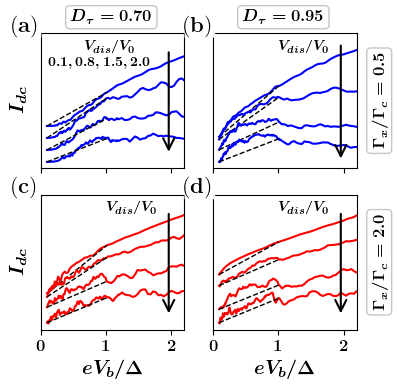

In [5]:
# Use scatter plot to indicate the skewness of the CPR.

import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from read_plot_assist import *

import matplotlib.colors as mcolors
from matplotlib.colors import Normalize


reduced_factor = (2 * 1.6e-19 * 1e-3 / (4.13e-15) * 1e9)*0.3*2 

               # such that the unit is e \Delta /hbar, factor 2 is coming from the half 1 of the electron operator 

import pandas as pd
import csv


def read_dc_data(file_path, twoD_index= False,spectra_index =False):
    """读取CPR数据文件，提取元数据和测量数据"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # 特殊处理sweep_values参数
                    if key == 'sweep_values':
                        try:
                            value_arr = np.array(ast.literal_eval(value_str))
                            metadata['sweep_min'] = float(np.min(value_arr))
                            metadata['sweep_max'] = float(np.max(value_arr))
                            metadata['sweep_points'] = len(value_arr)
                            # 保留参数名参考
                            if 'sweep_parameter' in metadata:
                                metadata['sweep_parameter'] = metadata['sweep_parameter']
                        except:
                            metadata[key] = value_str
                        continue
                    
                    # 尝试解析数组
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # 尝试数值转换
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # 检测并跳过标题行
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            data_lines = data_lines[1:]
    
    # 创建DataFrame
    if twoD_index:
        if spectra_index:
            df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                          columns=['v_tau','Magnetic Field', 'Energy', 'DOS'])
        else:
            df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                          columns=['Magnetic Field', 'Bias Voltage', 'Current','SidebandN'])
    
    else:
        df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                          columns=[ 'Bias Voltage', 'Current','SidebandN'])

    # 转换数据类型
    if spectra_index:
        df = df.astype({
            'Magnetic Field': float,
            'Energy': float,
           'DOS': float
            })
        # 确保磁场方向正确
        df = df.sort_values(by='Magnetic Field')
    else:
        df = df.astype({
            'Bias Voltage': float,
            'Current': float,
           'SidebandN': int
        })
        
        # 确保磁场方向正确
        df = df.sort_values(by='Bias Voltage')
        
    return metadata, df
    
# ======================
# 主程序
# ======================
def main():
    # 获取绘图参数
    plot_config = set_plotting_style()
    
    # 设置工作目录
    dir = os.getcwd() 
    dirF = os.path.join(dir, "Plots_collection")
    
    # 确保Plots_collection目录存在
    if not os.path.exists(dirF):
        os.makedirs(dirF)
        print(f"Created directory: {dirF}")
    else:
        print(f"Directory already exists: {dirF}")
    
    # 创建图形和布局
    ################  previous figure set   
    # width = 3.847 * 1.3
    # height = 0.64 * width*2
    # fig = plt.figure(figsize=(width, height))
    
    ############### updated figure set   
    # width = 3.847 * 2.1
    # height = 0.64 * width * 1.8

    # width = 3.847*1.6  # * 1.35
    # height = 1.4 * width #1.2 * width
    
    width = 3.847*1.0  # * 1.35
    height = 1.0 * width  #1.2 * width
    
    fig = plt.figure(figsize=(width, height))
    

    # 创建主GridSpec：2行1列
    main_gs = GridSpec(2, 1, figure=fig, height_ratios=[1., 1.0],hspace=0.2)
    
    # 顶部区域：创建2个面板的GridSpec
    top_gs = GridSpecFromSubplotSpec(1, 2, subplot_spec=main_gs[0], width_ratios=[1, 1.0],wspace=0.2)
    
    
    ax1 = fig.add_subplot(top_gs[0, 0])
    ax2 = fig.add_subplot(top_gs[0, 1])
    
    # 底部区域：创建3个面板的GridSpec
    bottom_gs = GridSpecFromSubplotSpec(1, 2, subplot_spec=main_gs[1], width_ratios=[1, 1],wspace=0.2)
        
    ax3 = fig.add_subplot(bottom_gs[0, 0])
    ax4 = fig.add_subplot(bottom_gs[0, 1])

    # 获取配置参数
    colors = plot_config['colors']
    line_styles = plot_config['line_styles']
    legend_settings = plot_config['legend_settings']
    tick_settings = plot_config['tick_settings']
    grid_settings = plot_config['grid_settings']
    sizes = plot_config['sizes']
    labelpad_distance = -1
    
    # ======================
    # Panel 1: CPR curves
    # ======================
    # # ax0 = fig.add_subplot(gs[1, 0])
    # vtaus0 = [0.842, 1.000]
    # selected_bs = [0.5, 2.0]
    
    # # 自定义离散颜色方案


    # alpha_values = [0.6,0.6,0.6,0.6,0.6,0.6,0.6] #[1,1,1,1,1,1,1] [0.8,0.8,0.8,0.8,0.8,0.8,0.8]

    # colors_add = ['#1E90FF', '#4169E1', 'black', '#DC143C', '#FF0000']
    colors_add = ['#00FFFF', '#0000FF', 'black', '#FF00FF', '#FF0000']
    
    cmap_Bs = mcolors.LinearSegmentedColormap.from_list('custom_diverging', colors_add, N=256)
    norm = Normalize(vmin=0, vmax=2)
    end_index=95

    # # 绘制数据

    Vdis_list = [0.1, 0.8,1.5,2.0] # 0.5, 
    vtau = 0.822

    # 计算透明度梯度
    alpha_min = 0.4
    alpha_max = 1
    alpha_values = [alpha_max,
                    alpha_max*0.75, 
                    alpha_max*0.5,
                    alpha_min*1.45,
                    alpha_min*1.25,
                    alpha_min*1.1,
                    alpha_min] #np.linspace(alpha_max, alpha_min, len(Vdis_list))
    
    # alpha_values = list(reversed(alpha_values)) 
    alpha_values = [0.6,0.6,0.6]
    # 使用单一颜色但不同透明度绘制数据
    for i0, Vdis in enumerate(Vdis_list):
        file_path = f"DC_adaptive=True_B=0.5_Vdis={Vdis:.1f}_Vtau={vtau:.3f}_disorder1_dec23.csv"

        metadata, df = read_dc_data(file_path)
        xs_assist = np.linspace(df['Bias Voltage'].values[3]/0.3, df['Bias Voltage'].values[end_index]/0.3,21)
        k_slope = (-df['Current'].values[3] + df['Current'].values[end_index])/(df['Bias Voltage'].values[end_index]/0.3 -df['Bias Voltage'].values[3]/0.3)
        ys_assist = k_slope*(xs_assist - df['Bias Voltage'].values[3]/0.3) + df['Current'].values[3]

    
        if i0 ==-1:
            ax1.plot(df['Bias Voltage'].values/0.3, df['Current'].values - 1.2*(i0),
                     color = 'k', 
                     alpha = 1,
                     linewidth=line_styles['default']['linewidth'])
        else:
            
            ax1.plot(df['Bias Voltage'].values[3:]/0.3, df['Current'].values[3:] - 1.2*(i0),
                     color= cmap_Bs(norm(0.5)), #colors['top_panel2'], 
                     alpha = 1, #alpha_values[i0],
                     linewidth=line_styles['default']['linewidth'])
            ax1.plot(xs_assist,ys_assist -1.2*(i0),
                     'k',linestyle ='--',linewidth=1,alpha = 1 #alpha_values[i0]
                    )
    
    # 修改轴标签设置，与代码2一致
    ax1.set_yticks([])
    # ax0.set_xlabel(r'$\boldsymbol{eV_{b}/\Delta}$', fontsize=sizes['label'])
    
    ax1.set_ylabel(r'$\boldsymbol{I_{dc}}$', fontsize=sizes['label'],labelpad =10)
    
    # ax0.set_ylabel(r'$\boldsymbol{I_c~(e\Delta/h)}$', fontsize=sizes['label'],labelpad =15)
    ax1.set_xticks([0,1,2])
    ax1.set_xlim([0,2.2])
    ax1.set_xticklabels([r"", r"", r""], 
                       color=tick_settings['color'], size=sizes['tick'])

    ax1.annotate('', xy=(0.89, 0.1), xytext=(0.89, 0.88), xycoords='axes fraction',
                arrowprops=dict(arrowstyle='->', color='black', lw=1.5, mutation_scale=20))
    ax1.text(0.3, 0.9, r'$\boldsymbol{V_{dis}/V_0}$', transform=ax1.transAxes, 
             ha='left', va='center', fontsize= sizes['legend']-2, rotation=0)
    ax1.text(0.05, 0.78, r'$\boldsymbol{0.1,0.8,1.5,2.0}$', transform=ax1.transAxes, 
             ha='left', va='center', fontsize=sizes['legend']-2, rotation=0)
    ax1.text(0.20, 1.12, r'$\boldsymbol{D_{\tau} = 0.70}$', transform=ax1.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0,
                                bbox=dict(boxstyle='round',  facecolor='white', edgecolor ='silver',alpha = 0.9,pad=0.25)
            )


    for i0, Vdis in enumerate(Vdis_list):
        file_path = f"DC_adaptive=True_B=2.0_Vdis={Vdis:.1f}_Vtau={vtau:.3f}_disorder1_dec23.csv"
        
        metadata, df = read_dc_data(file_path)
        xs_assist = np.linspace(df['Bias Voltage'].values[3]/0.3, df['Bias Voltage'].values[end_index]/0.3,21)
        k_slope = (-df['Current'].values[3] + df['Current'].values[end_index])/(df['Bias Voltage'].values[end_index]/0.3 -df['Bias Voltage'].values[3]/0.3)
        ys_assist = k_slope*(xs_assist - df['Bias Voltage'].values[3]/0.3) + df['Current'].values[3]

    
        if i0 ==-1:
            ax3.plot(df['Bias Voltage'].values/0.3, df['Current'].values - 1.2*(i0),
                     color = 'k', 
                     alpha = 1,
                     linewidth=line_styles['default']['linewidth'])
        else:
            
            ax3.plot(df['Bias Voltage'].values[3:]/0.3, df['Current'].values[3:] - 0.8*(i0),
                     color= cmap_Bs(norm(2.0)), #colors['top_panel2'], 
                     alpha = 1, #alpha_values[i0],
                     linewidth=line_styles['default']['linewidth'])
            ax3.plot(xs_assist,ys_assist -0.8*(i0),
                     'k',linestyle ='--',linewidth=1,alpha = 1 #alpha_values[i0]
                    )
    
    # 修改轴标签设置，与代码2一致
    ax3.set_yticks([])
    ax3.set_xlabel(r'$\boldsymbol{eV_{b}/\Delta}$', fontsize=sizes['label'])
    
    ax3.set_ylabel(r'$\boldsymbol{I_{dc}}$', fontsize=sizes['label'],labelpad =10)
    
    # ax0.set_ylabel(r'$\boldsymbol{I_c~(e\Delta/h)}$', fontsize=sizes['label'],labelpad =15)
    ax3.set_xticks([0,1,2])
    ax3.set_xlim([0,2.2])
    ax3.set_xticklabels([r"\bf{0}", r"\bf{1}", r"\bf{2}"], 
                       color=tick_settings['color'], size=sizes['tick'])

    ax3.annotate('', xy=(0.89, 0.1), xytext=(0.89, 0.88), xycoords='axes fraction',
                arrowprops=dict(arrowstyle='->', color='black', lw=1.5, mutation_scale=20))
    ax3.text(0.45, 0.9, r'$\boldsymbol{V_{dis}/V_0}$', transform=ax3.transAxes, 
             ha='left', va='center', fontsize= sizes['legend']-2, rotation=0)
    # ax3.text(0.25, 0.08, r'$\boldsymbol{0 \rightarrow 1}$', transform=ax3.transAxes, 
    #          ha='left', va='center', fontsize=sizes['legend']-2, rotation=0)
    # ax3.text(0.1, 0.85, r'$\boldsymbol{D_{\tau} = 0.70}$', transform=ax3.transAxes, 
    #          ha='left', va='center', fontsize=sizes['legend'], rotation=0,
    #                             bbox=dict(boxstyle='round',  facecolor='white', edgecolor ='silver',alpha = 0.9,pad=0.25)
    #         )

    vtau= 0.934
    for i0, Vdis in enumerate(Vdis_list):
        file_path = f"DC_adaptive=True_B=0.5_Vdis={Vdis:.1f}_Vtau={vtau:.3f}_disorder1_dec23.csv"
        
        metadata, df = read_dc_data(file_path)
        xs_assist = np.linspace(df['Bias Voltage'].values[3]/0.3, df['Bias Voltage'].values[end_index]/0.3,21)
        k_slope = (-df['Current'].values[3] + df['Current'].values[end_index])/(df['Bias Voltage'].values[end_index]/0.3 -df['Bias Voltage'].values[3]/0.3)
        ys_assist = k_slope*(xs_assist - df['Bias Voltage'].values[3]/0.3) + df['Current'].values[3]

    
        if i0 ==-1:
            ax2.plot(df['Bias Voltage'].values/0.3, df['Current'].values - 1.2*(i0),
                     color = 'k', 
                     alpha = 1,
                     linewidth=line_styles['default']['linewidth'])
        else:
            
            ax2.plot(df['Bias Voltage'].values[3:]/0.3, df['Current'].values[3:] - 1.2*(i0),
                     color= cmap_Bs(norm(0.5)), #colors['top_panel2'], 
                     alpha = 1, #alpha_values[i0],
                     linewidth=line_styles['default']['linewidth'])
            ax2.plot(xs_assist,ys_assist -1.2*(i0),
                     'k',linestyle ='--',linewidth=1,alpha = 1 #alpha_values[i0]
                    )
    
    # 修改轴标签设置，与代码2一致
    ax2.set_yticks([])
    # ax0.set_xlabel(r'$\boldsymbol{eV_{b}/\Delta}$', fontsize=sizes['label'])
    
    # ax2.set_ylabel(r'$\boldsymbol{I_c}$', fontsize=sizes['label'],labelpad =10)
    
    ax2.set_ylabel(r'', fontsize=sizes['label'],labelpad =10)
    ax2.set_xticks([0,1,2])
    ax2.set_xlim([0,2.2])
    ax2.set_xticklabels([r"", r"", r""], 
                       color=tick_settings['color'], size=sizes['tick'])

    ax2.annotate('', xy=(0.89, 0.05), xytext=(0.89, 0.93), xycoords='axes fraction',
                arrowprops=dict(arrowstyle='->', color='black', lw=1.5, mutation_scale=20))
    ax2.text(0.45, 0.9, r'$\boldsymbol{V_{dis}/V_0}$', transform=ax2.transAxes, 
             ha='left', va='center', fontsize= sizes['legend']-2, rotation=0)
    ax2.text(0.20, 1.12, r'$\boldsymbol{D_{\tau} = 0.95}$', transform=ax2.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0,
                                bbox=dict(boxstyle='round',  facecolor='white', edgecolor ='silver',alpha = 0.9,pad=0.25)
            )
    
    ax2.text(1.1, 0.5, r'$\boldsymbol{\Gamma_x/\Gamma_c = 0.5}$', transform=ax2.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=90,
                                bbox=dict(boxstyle='round',  facecolor='white', edgecolor ='silver',alpha = 0.9,pad=0.25)
            )
    
    for i0, Vdis in enumerate(Vdis_list):
        file_path = f"DC_adaptive=True_B=2.0_Vdis={Vdis:.1f}_Vtau={vtau:.3f}_disorder1_dec23.csv"
        
        metadata, df = read_dc_data(file_path)
        xs_assist = np.linspace(df['Bias Voltage'].values[3]/0.3, df['Bias Voltage'].values[end_index]/0.3,21)
        k_slope = (-df['Current'].values[3] + df['Current'].values[end_index])/(df['Bias Voltage'].values[end_index]/0.3 -df['Bias Voltage'].values[3]/0.3)
        ys_assist = k_slope*(xs_assist - df['Bias Voltage'].values[3]/0.3) + df['Current'].values[3]

    
        if i0 ==-1:
            ax4.plot(df['Bias Voltage'].values/0.3, df['Current'].values - 1.2*(i0),
                     color = 'k', 
                     alpha = 1,
                     linewidth=line_styles['default']['linewidth'])
        else:
            
            ax4.plot(df['Bias Voltage'].values[3:]/0.3, df['Current'].values[3:] - 0.8*(i0),
                     color= cmap_Bs(norm(2.0)), #colors['top_panel2'], 
                     alpha = 1, #alpha_values[i0],
                     linewidth=line_styles['default']['linewidth'])
            ax4.plot(xs_assist,ys_assist -0.8*(i0),
                     'k',linestyle ='--',linewidth=1,alpha = 1 #alpha_values[i0]
                    )
    
    # 修改轴标签设置，与代码2一致
    ax4.set_yticks([])
    ax4.set_xlabel(r'$\boldsymbol{eV_{b}/\Delta}$', fontsize=sizes['label'])
    
    # ax4.set_ylabel(r'$\boldsymbol{I_c}$', fontsize=sizes['label'],labelpad =10)
    ax4.set_ylabel(r'', fontsize=sizes['label'],labelpad =10)
    
    # ax0.set_ylabel(r'$\boldsymbol{I_c~(e\Delta/h)}$', fontsize=sizes['label'],labelpad =15)
    ax4.set_xticks([0,1,2])
    ax4.set_xlim([0,2.2])
    ax4.set_xticklabels([r"\bf{0}", r"\bf{1}", r"\bf{2}"], 
                       color=tick_settings['color'], size=sizes['tick'])

    ax4.annotate('', xy=(0.89, 0.1), xytext=(0.89, 0.88), xycoords='axes fraction',
                arrowprops=dict(arrowstyle='->', color='black', lw=1.5, mutation_scale=20))
    ax4.text(0.45, 0.9, r'$\boldsymbol{V_{dis}/V_0}$', transform=ax4.transAxes, 
             ha='left', va='center', fontsize= sizes['legend']-2, rotation=0)

    ax4.text(1.1, 0.5, r'$\boldsymbol{\Gamma_x/\Gamma_c = 2.0}$', transform=ax4.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=90,
                                bbox=dict(boxstyle='round',  facecolor='white', edgecolor ='silver',alpha = 0.9,pad=0.25)
            )

    ax1.text(-0.2, 1.05, r'$\bf{(a)}$', transform=ax1.transAxes, 
             ha='left', va='center', fontsize=sizes['label']+2, rotation=0,
            bbox=dict(boxstyle='round',  facecolor='white', edgecolor ='none',alpha = 0.9,pad=0.)
       )     
    ax2.text(-0.2, 1.05, r'$\bf{(b)}$', transform=ax2.transAxes, 
             ha='left', va='center', fontsize=sizes['label']+2, rotation=0,
            bbox=dict(boxstyle='round',  facecolor='white', edgecolor ='none',alpha = 0.9,pad=0.)
       ) 
    ax3.text(-0.2, 1.05, r'$\bf{(c)}$', transform=ax3.transAxes, 
             ha='left', va='center', fontsize=sizes['label']+2, rotation=0,
            bbox=dict(boxstyle='round',  facecolor='white', edgecolor ='none',alpha = 0.9,pad=0.0)
       ) 

    ax4.text(-0.2, 1.05, r'$\bf{(d)}$', transform=ax4.transAxes, 
             ha='left', va='center', fontsize=sizes['label']+2, rotation=0,
            bbox=dict(boxstyle='round',  facecolor='white', edgecolor ='none',alpha = 0.9,pad=0.0)
       )     
    # ====================== ====================== ====================== ======================
    # Panel 1: Critical current vs B for several Dtaus
    # ====================== ====================== ====================== ======================
    

    # ======================
    # 调整布局并保存
    # ======================
    plt.subplots_adjust(left=0.08, right=0.90, bottom=0.15, top=0.92)
    
    # 保存图形到Plots_collection目录
    output_path = os.path.join(dirF, "FigS2.png")
    pdf_output_path = os.path.join(dirF, "FigS2.pdf")
    eps_output_path= os.path.join(dirF, "FigS2.eps")
    
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
    plt.savefig(pdf_output_path, dpi=300, bbox_inches='tight', facecolor='white') #colors['background']
    plt.savefig(eps_output_path, dpi=300, bbox_inches='tight', facecolor='white',format='eps')
    
    print(f"Plot saved to: {output_path}")
    plt.show()

# ======================
# 运行主程序
# ======================
if __name__ == "__main__":
    main()